# Checking taxonomy associated with Dada2 ASVs using feature classifier (Qiime2) and Kraken2

Importing the ASV table and the taxonomic assignments (dada2 on raw reads, forward), a table with taxonomic assignment by feature-classifier and by Kraken2:

In [30]:
import pandas as pd

asv_taxonomy_qiime2_df = pd.read_table('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/taxonomic_bar_plots/rawreads/silva_taxonomy_fw_rawreads/taxonomy.tsv')
asv_taxonomy_qiime2_df.set_index('ASV', inplace=True)

asv_taxonomy_kraken2_df = pd.read_table('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Kraken2/dada2_asvs_rawreads/kraken2_asvs_dada2_rawreads/kraken2_out/taxonomy_from_kraken2_out.txt')
asv_taxonomy_kraken2_df.set_index('ASV', inplace=True)

asv_featuretable_df = pd.read_table('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/dada2/rawreads/table-paired-end_wallace2018_assingle_forward_rawreads-dada2/featuretable_fw_rawreads.tsv')
asv_featuretable_df.set_index('ASV', inplace=True)


In [25]:
asv_featuretable_unassigned_qiime2_df = asv_featuretable_df.loc[asv_taxonomy_qiime2_df[asv_taxonomy_qiime2_df['Taxon'] == 'Unassigned'].index]
print('Total ASV frequencies', asv_featuretable_df.sum().sum())
print('ASV frequencies for ASVs with unassigned taxon', asv_featuretable_unassigned_qiime2_df.sum().sum())

Total ASV frequencies 63712653.0
ASV frequencies for ASVs with unassigned taxon 5260647.0


In [26]:
asv_featuretable_unassigned_kraken2_df = asv_featuretable_df.loc[asv_taxonomy_kraken2_df[asv_taxonomy_kraken2_df['Taxon'] == 'unclassified (taxid 0)'].index]
print('Total ASV frequencies', asv_featuretable_df.sum().sum())
print('ASV frequencies for ASVs with unassigned taxon', asv_featuretable_unassigned_kraken2_df.sum().sum())

Total ASV frequencies 63712653.0
ASV frequencies for ASVs with unassigned taxon 55.0


## Plotting the most frequent Kraken2 taxons associated with Qiime2 unassigned ASVs

In [28]:
asv_taxonomy_kraken2_df.loc[asv_featuretable_unassigned_qiime2_df.index].value_counts()

Taxon                                       
Bacteria (taxid 3)                              157
Sphingomonas (taxid 2852)                        98
Methylobacterium-Methylorubrum (taxid 46157)     56
Deinococcus (taxid 44886)                        31
Massilia (taxid 46388)                           30
                                               ... 
Lacticaseibacillus (taxid 50152)                  1
Lactobacillaceae (taxid 1836)                     1
Latilactobacillus (taxid 50155)                   1
Leuconostoc (taxid 50157)                         1
uncultured (taxid 46429)                          1
Name: count, Length: 297, dtype: int64

<Axes: title={'center': 'Kraken2 assignments for Qiime2 unassigned ASVs'}, ylabel='count'>

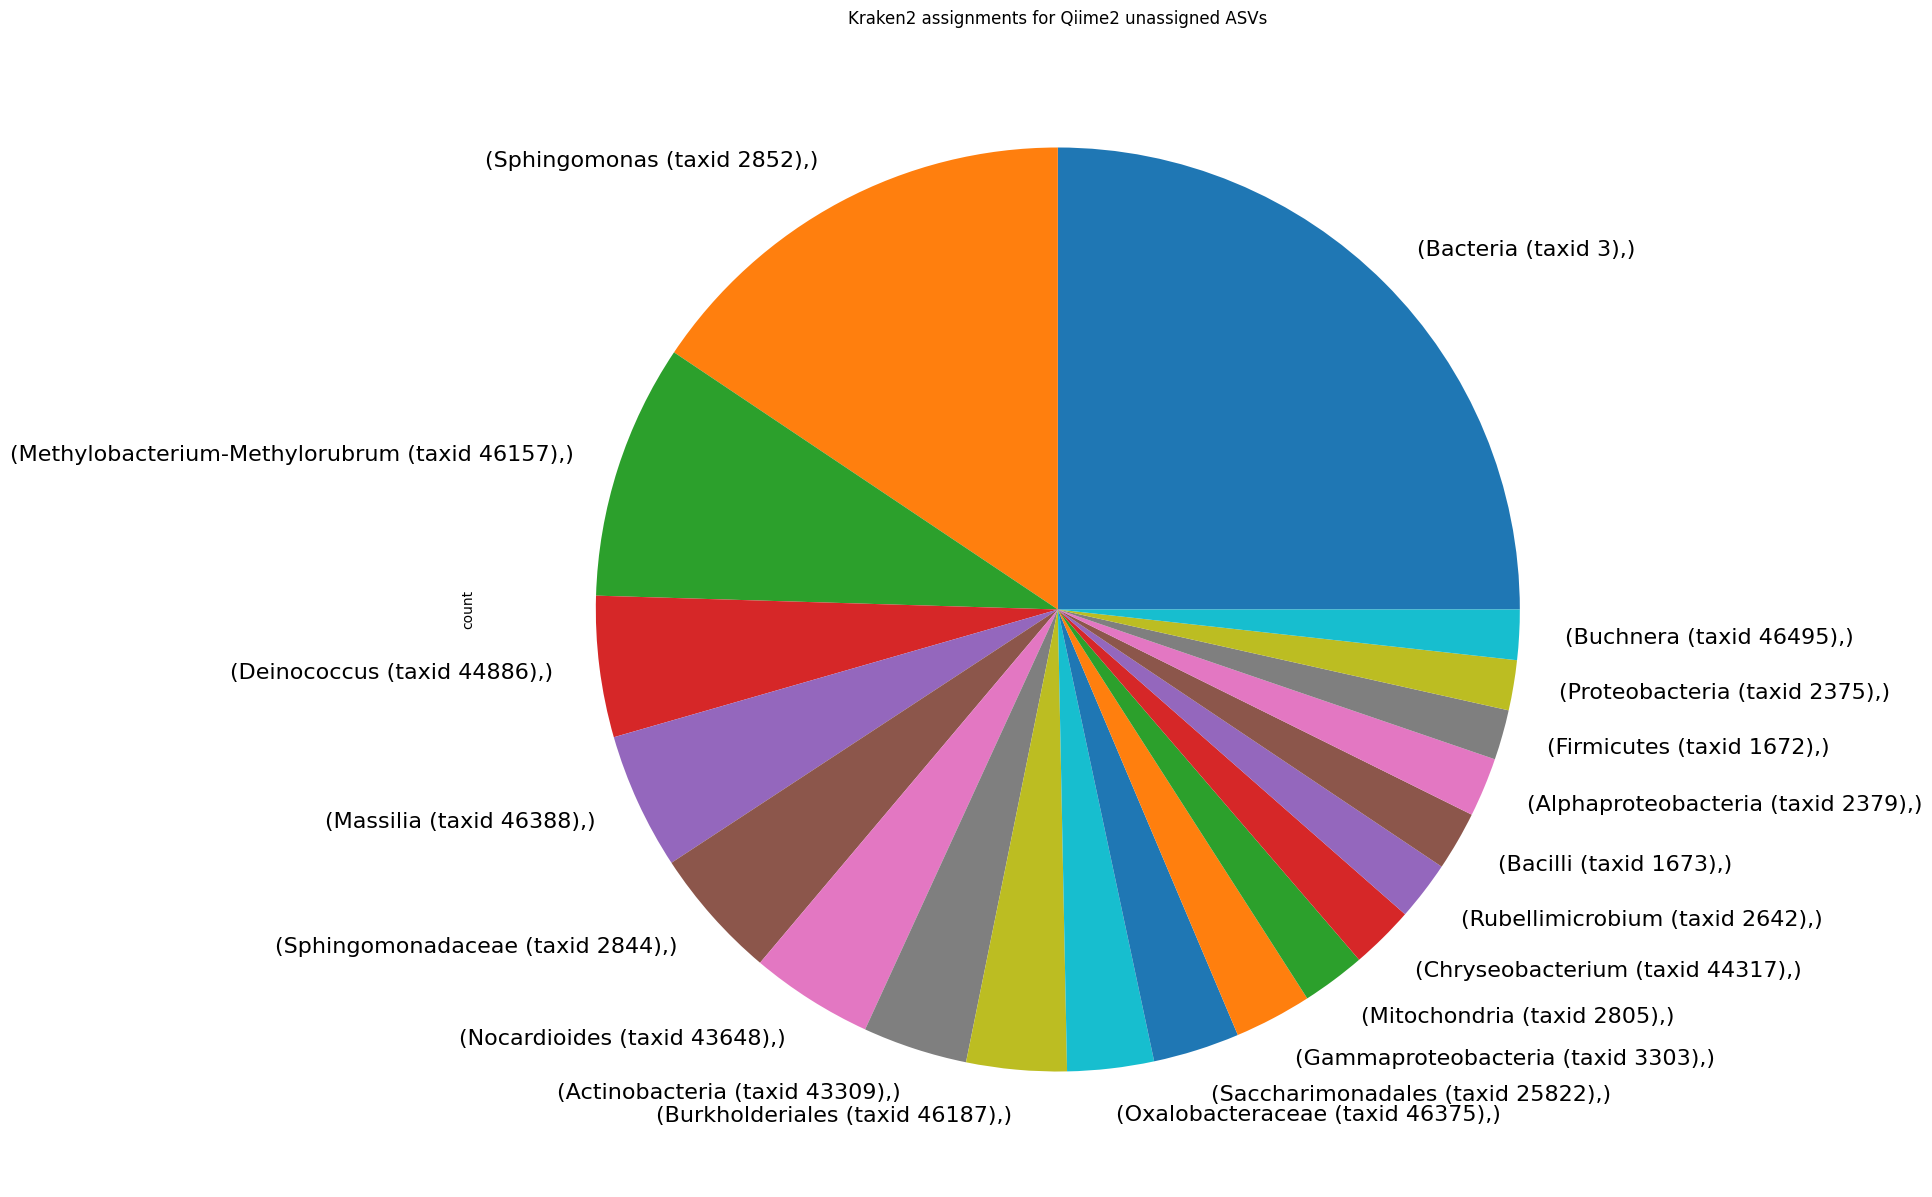

In [29]:
# Plotting for the 20 most frequent unassigned ASVs
asv_taxonomy_kraken2_df.loc[asv_featuretable_unassigned_qiime2_df.index].value_counts().head(n=20).plot(kind='pie', title='Kraken2 assignments for Qiime2 unassigned ASVs',
                                                                                                        figsize=(15,15), rot=90, textprops={'fontsize': 16})